In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\win\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
df = pd.read_csv(r'original_training_set.csv')

In [18]:
df.head()

,id_pair,curated_smiles_molecule_a,curated_smiles_molecule_b,tanimoto_cdk_Extended,TanimotoCombo,frac_similar
0,1,CCN(CC)CC(=O)Nc1c(C)cccc1C,CCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,0.641434,1.623,0.4688
1,2,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CC...,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2,0.928846,1.812,0.9375
2,3,COc1ccccc1OCC(O)CO,COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1,0.381119,1.064,0.1406
3,4,CCOc1ccccc1OCCN[C@H](C)Cc1ccc(OC)c(S(N)(=O)=O)c1,CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1,0.213429,0.674,0.0313
4,5,C[C@H](N)Cc1ccccc1,CC(C)(N)Cc1ccccc1,0.905660,1.690,0.8828


In [31]:
#Drop unwanted columns
df = df.drop(['id_pair','curated_smiles_molecule_a','curated_smiles_molecule_b','frac_similar'],axis = 1)
df.head()

,tanimoto_cdk_Extended,TanimotoCombo
0,0.641434,1.623
1,0.928846,1.812
2,0.381119,1.064
3,0.213429,0.674
4,0.905660,1.690


In [28]:
#Add values in missing rows
df['tanimoto_cdk_Extended'] = df['tanimoto_cdk_Extended'].fillna(method='ffill')
df['TanimotoCombo'] = df['TanimotoCombo'].fillna(df['TanimotoCombo'].mean())

1) Range

In [42]:
#Run for loop for getting range in data set. 
for i in df.columns:
    df_range= df[i].max()-df[i].min()
    print('Range of {}: {}'.format(i,df_range))

Range of tanimoto_cdk_Extended: 0.894594595
Range of TanimotoCombo: 1.4260000000000002


2) Interquartile range (IQR)

In [47]:
#Find first quartile 
Q1 = df.tanimoto_cdk_Extended.quantile(0.25)

In [48]:
#Find third quartile
Q3 = df.tanimoto_cdk_Extended.quantile(0.75)

In [22]:
#Find Interquartile quartile
IQR = Q3 - Q1
print('IQR for tanimoto cdk Extended is: ',IQR)

IQR for tanimoto cdk Extended is:  0.48233704624999996


In [24]:
#Find first quartile of TanimotoCombo
Q1 = df.TanimotoCombo.quantile(0.25)

In [25]:
#Find third quartile of TanimotoCombo
Q3 = df.TanimotoCombo.quantile(0.75)

In [26]:
#Find Interquartile quartile
IQR = Q3 - Q1
print('IQR for TanimotoCombo is: ',IQR)

IQR for TanimotoCombo is:  0.756


3) Median

In [32]:
#Find median in dataFrame
median = df.median()
print('Median of our data frame is: \n',median)

Median of our data frame is: 
 tanimoto_cdk_Extended    0.55814
TanimotoCombo            1.32200
dtype: float64


4) Mean

In [33]:
#Find mean in data Frame
mean = df.mean()
print('Mean of our data frame is: \n',mean)

Mean of our data frame is: 
 tanimoto_cdk_Extended    0.553941
TanimotoCombo            1.315081
dtype: float64


5) Mode

In [34]:
#Find mode in dataframe
mode= df.mode()
print('Mode of our data frame is: \n',mode)

Mode of our data frame is: 
    tanimoto_cdk_Extended  TanimotoCombo
0               0.244207       0.674000
1               1.000000       0.729000
2                    NaN       1.315081


6) 1
st and 3rd quartiles

In [30]:
#First quartile
first_quartiles = df.quantile(0.25)
#3rd quartile
third_quartiles = df.quantile(0.75)

In [35]:
print('1st Quartile of our data Frame is:\n ',first_quartiles)
print('3rd Quartile of our data Frame is: \n',third_quartiles)

1st Quartile of our data Frame is:
  tanimoto_cdk_Extended    0.30059
TanimotoCombo            0.90250
Name: 0.25, dtype: float64
3rd Quartile of our data Frame is: 
 tanimoto_cdk_Extended    0.782927
TanimotoCombo            1.658500
Name: 0.75, dtype: float64


7) Sample variance and sample standard deviation

In [8]:
import statistics
#variance of dataframe
variance = statistics.variance(df.TanimotoCombo)
#Stander deviation
stdev = statistics.stdev(df.TanimotoCombo)

print("Sample variance of TanimotoCombo:", variance)
print("Sample standard deviation of TanimotoCombo:", stdev)

Sample variance of TanimotoCombo: 0.17135719353535353
Sample standard deviation of TanimotoCombo: 0.41395312963589675


In [49]:
import statistics
#variance of dataframe
variance = statistics.variance(df.tanimoto_cdk_Extended)
#Stander deviation
stdev = statistics.stdev(df.tanimoto_cdk_Extended)

print("Sample variance of tanimoto_cdk_Extended:", variance)
print("Sample standard deviation of tanimoto_cdk_Extended:", stdev)

Sample variance of tanimoto_cdk_Extended: 0.07358941122658484
Sample standard deviation of tanimoto_cdk_Extended: 0.27127368325472495


8) Find Outliers

In [43]:
#Use IQR method for finding outlier
Q1 = df.tanimoto_cdk_Extended.quantile(0.25)
Q3 = df.tanimoto_cdk_Extended.quantile(0.75)
IQR = Q3-Q1

In [45]:
Lower_bound = Q1 - 1.5 * IQR 
Upper_bound = Q3 + 1.5 * IQR

In [56]:
outliers = [x for x in df.tanimoto_cdk_Extended if x < Lower_bound or x > Upper_bound]

In [58]:
outliers

[]

In [59]:
Q1 = df.TanimotoCombo.quantile(0.25)
Q3 = df.TanimotoCombo.quantile(0.75)
IQR = Q3-Q1

In [60]:
Lower_bound = Q1 - 1.5 * IQR 
Upper_bound = Q3 + 1.5 * IQR

In [62]:
outliers = [x for x in df.TanimotoCombo if x < Lower_bound or x > Upper_bound]

In [63]:
outliers

[]

#### Draw the following diagrams

1) Box Plot

In [37]:
import matplotlib.pyplot as plt

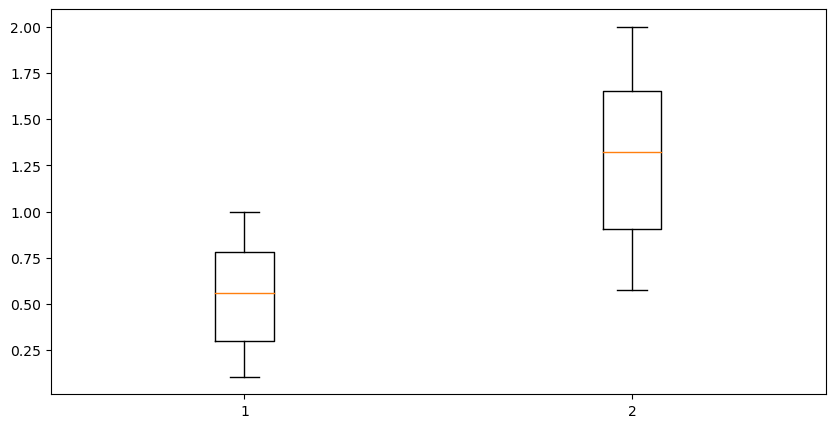

In [44]:
#box plot fig size
fig = plt.figure(figsize=(10, 5))
plt.boxplot(df)
plt.show()

2) Sea-born Simplot

In [36]:
import seaborn as sns

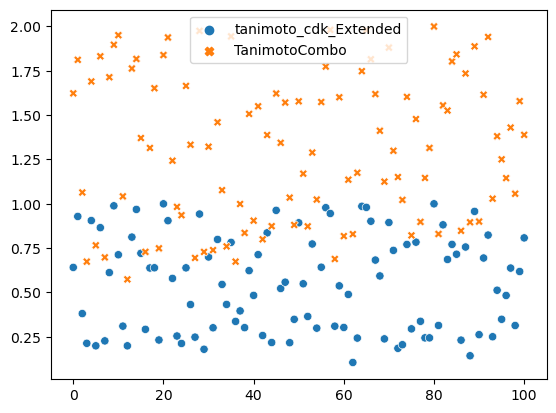

In [70]:
sns.scatterplot(data=df)
plt.show()

3) Linear regression

In [71]:
from sklearn.linear_model import LinearRegression

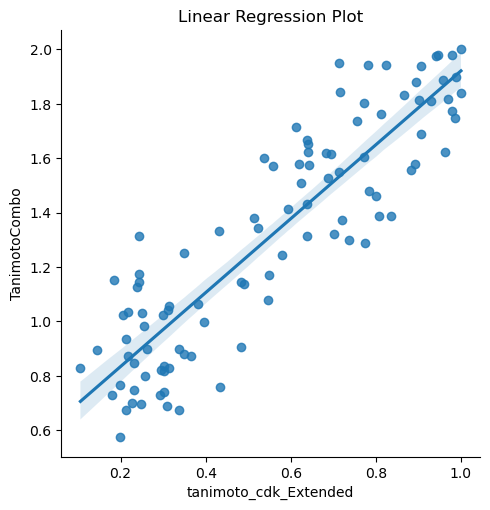

In [52]:
# Draw a linear regression plot using Seaborn
sns.lmplot(x='tanimoto_cdk_Extended', y='TanimotoCombo', data=df)
plt.xlabel('tanimoto_cdk_Extended')
plt.ylabel('TanimotoCombo')
plt.title('Linear Regression Plot')
plt.show()

4) HeatMap

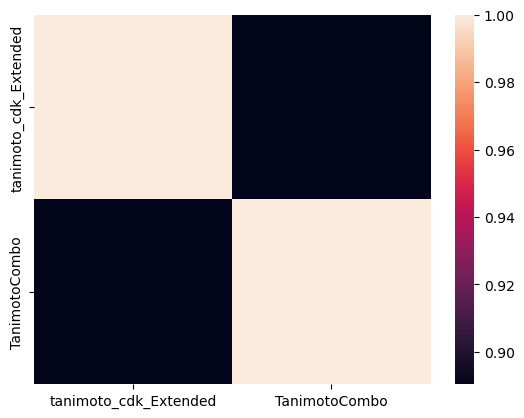

In [39]:
corr = df.corr()
p1 = sns.heatmap(corr)